In [178]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.svm import SVR
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.svm import SVR, SVC
from sklearn.linear_model import Ridge
import math
from sklearn.model_selection import cross_val_score

# Loading Built-In Set

## Loading `diabetes` Dataset

**Question 1**

- Loading `diabetes` dataset

In [179]:
diabetes: np.ndarray = load_diabetes()

## Splitting Dataset into Training Set and Test Set

**Question 2**

- Splitting data into training set and test set

In [180]:
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, random_state=55)

## Checks

In [181]:
print(f"Training Features Dimensions: {X_train.shape}")
print(f"Training Labels Dimensions: {y_train.shape}")
print(f"Testing Features Dimensions: {X_test.shape}")
print(f"Testing Labels Dimensions: {y_test.shape}")

Training Features Dimensions: (331, 10)
Training Labels Dimensions: (331,)
Testing Features Dimensions: (111, 10)
Testing Labels Dimensions: (111,)


In [182]:
print(X_train[0])

[-0.09996055 -0.04464164 -0.06764124 -0.10895595 -0.07449446 -0.07271173
  0.01550536 -0.03949338 -0.04987245 -0.00936191]


In [183]:
header: np.ndarray = diabetes.feature_names[:]

In [184]:
print((header))

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


## Regression

**Question 3**

- Computing $R^2$ for the `Lasso` model using default parameters

In [185]:
lasso: Lasso = Lasso().fit(X_train, y_train)

In [186]:
print(f"Training set score: {lasso.score(X_train, y_train)}")
print(f"Test set score: {lasso.score(X_test, y_test)}")

Training set score: 0.3355506896161845
Test set score: 0.37969961797249985


- Printing the number of features used in the model
- Printing names of the features used

In [187]:
print(f"Number of features used: {np.sum(lasso.coef_ != 0)}")
print(f"Features used: {[header[index] for index in (np.nonzero(lasso.coef_)[0])]}")

Number of features used: 3
Features used: ['bmi', 'bp', 's5']


- Deleting the variables so that they do not cause problems later on with similar names

In [188]:
del X_train, X_test, y_train, y_test

# Loading Diabetes from File

**Question 4**

- Importing data from file 
- Each sample is separated by `	` hence it is set as the `delimiter`
- The header (first row) is skipped as it is not data

In [189]:
diabetes: np.ndarray = np.genfromtxt('diabetes.data', delimiter='	', skip_header=1)

- Importing the headings (name of features)
  - When importing the data, the feature names were excluded

In [190]:
header: np.ndarray = np.genfromtxt('diabetes.data', delimiter='	', max_rows=1, dtype=str)
print(header)

['AGE' 'SEX' 'BMI' 'BP' 'S1' 'S2' 'S3' 'S4' 'S5' 'S6' 'Y']


- Separating features `X` and labels `y`

In [191]:
X: np.ndarray = diabetes[:, :-1]
y: np.ndarray = diabetes[:, -1]

In [192]:
print("Whole Data Sample: ", diabetes[0])
print("X: ", X[0])
print("y: ", y[0])

Whole Data Sample:  [ 59.       2.      32.1    101.     157.      93.2     38.       4.
   4.8598  87.     151.    ]
X:  [ 59.       2.      32.1    101.     157.      93.2     38.       4.
   4.8598  87.    ]
y:  151.0


**Question 5**

- Splitting data into training sets and test sets

In [193]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=55)

**Question 6**

- Computing $R^2$ score for the `Lasso` model using default parameters

In [194]:
lasso: Lasso = Lasso().fit(X_train, y_train)

In [195]:
print(f"Training set score: {lasso.score(X_train, y_train)}")
print(f"Test set score: {lasso.score(X_test, y_test)}")

Training set score: 0.4990579290275038
Test set score: 0.5300107053694756


In [196]:
print(f"Number of features used: {np.sum(lasso.coef_ != 0)}")
print(f"Names of features used: {header[np.nonzero(lasso.coef_)]}")

Number of features used: 9
Names of features used: ['AGE' 'SEX' 'BMI' 'BP' 'S1' 'S2' 'S3' 'S5' 'S6']


## StandardScalar

**Question 7**

- Preprocessing data using `StandardScalar`

In [197]:
scaler: StandardScaler = StandardScaler()

X_train_scaled: StandardScaler = scaler.fit(X_train)
X_test_scaled: StandardScaler = scaler.fit(X_test)

X_train_scaled: StandardScaler = scaler.transform(X_train)
X_test_scaled: StandardScaler = scaler.transform(X_test)

**Question 8**

- Computing $R^2$ for the `Lasso` model using default parameters

In [198]:
lasso = Lasso().fit(X_train_scaled, y_train)

In [199]:
print(f"Training set score: {lasso.score(X_train_scaled, y_train)}")
print(f"Test set score: {lasso.score(X_test_scaled, y_test)}")

Training set score: 0.5019803901580563
Test set score: 0.5406111447534504


In [200]:
print(f"Number of features used: {np.sum(lasso.coef_ != 0)}")
print(f"Names of features used: {header[np.nonzero(lasso.coef_)]}")

Number of features used: 7
Names of features used: ['SEX' 'BMI' 'BP' 'S1' 'S3' 'S5' 'S6']


- The data are closer to *Question 6* than to *Question 3*
  - The scores are very close at a difference of approximately $0.0029$ for the training score compared to $0.166$
  - The number of features used is also closer (9 for *6* and 3 for *3*)
- It is possible that the 2 datasets use different units 
  - This means that the imported dataset and the built in one should both be normalized together 

## Plotting

In [201]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train_scaled, y_train)
print(f"Training set score: {lasso001.score(X_train_scaled, y_train)}")
print(f"Test set score: {lasso001.score(X_test_scaled, y_test)}")
print(f"Number of features used: {np.sum(lasso001.coef_ != 0)}")
print(f"Names of features used: {header[np.nonzero(lasso001.coef_)]}")

Training set score: 0.505859881290142
Test set score: 0.5424672050061733
Number of features used: 10
Names of features used: ['AGE' 'SEX' 'BMI' 'BP' 'S1' 'S2' 'S3' 'S4' 'S5' 'S6']


In [202]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train_scaled, y_train)
print(f"Training set score: {lasso00001.score(X_train_scaled, y_train)}")
print(f"Test set score: {lasso00001.score(X_test_scaled, y_test)}")
print(f"Number of features used: {np.sum(lasso00001.coef_ != 0)}")
print(f"Names of features used: {header[np.nonzero(lasso00001.coef_)]}")

Training set score: 0.5058671320290168
Test set score: 0.5425436032210349
Number of features used: 10
Names of features used: ['AGE' 'SEX' 'BMI' 'BP' 'S1' 'S2' 'S3' 'S4' 'S5' 'S6']


**Question 9**

- The middle part of the graph seems to be better
- The score stays flat as as the number of feature increases until 8 features, at which point the score increases
- After that, there is no significant improvement in score

Text(0.5, 1.0, 'R^2 vs Number of features')

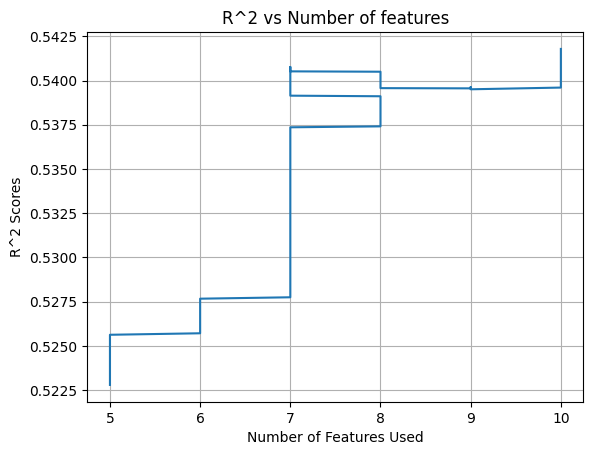

In [203]:
lasso_score: list[float] = []
total_coef: list[int] = []
a: float = 0.1
while a<=5:
    lasso_alpha: Lasso = Lasso(alpha=a,max_iter=1000).fit(X_train_scaled,y_train)
    lasso_score.append(lasso_alpha.score(X_test_scaled,y_test))
    total_coef.append(np.sum(lasso_alpha.coef_ !=0))    
    a += 0.01
plt.plot(total_coef,lasso_score)
plt.grid()
plt.xlabel("Number of Features Used")
plt.ylabel("R^2 Scores")
plt.title("R^2 vs Number of features")

- All the points are relatively close together for the different values of $\alpha$

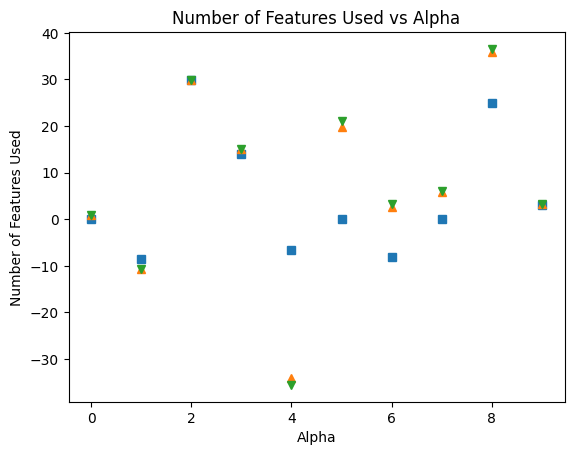

In [204]:
plt.xlabel("Alpha")
plt.ylabel("Number of Features Used")
plt.title("Number of Features Used vs Alpha")
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

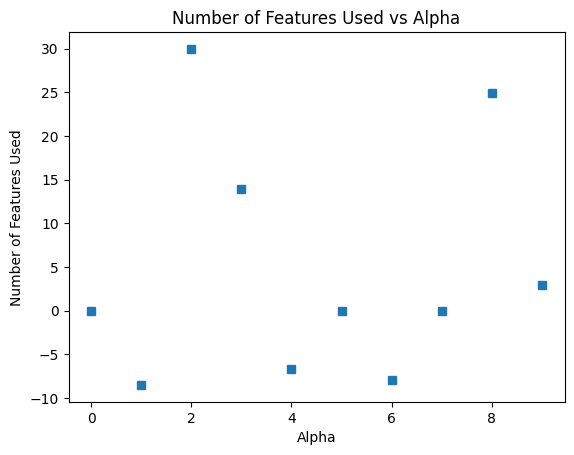

In [205]:
plt.xlabel("Alpha")
plt.ylabel("Number of Features Used")
plt.title("Number of Features Used vs Alpha")
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
# plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
# plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

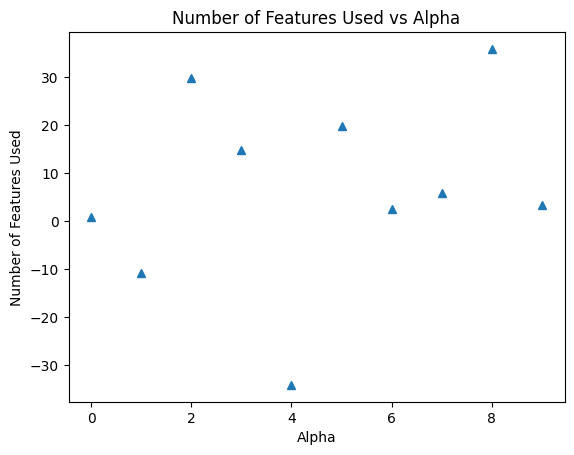

In [206]:
plt.xlabel("Alpha")
plt.ylabel("Number of Features Used")
plt.title("Number of Features Used vs Alpha")
# plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
# plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

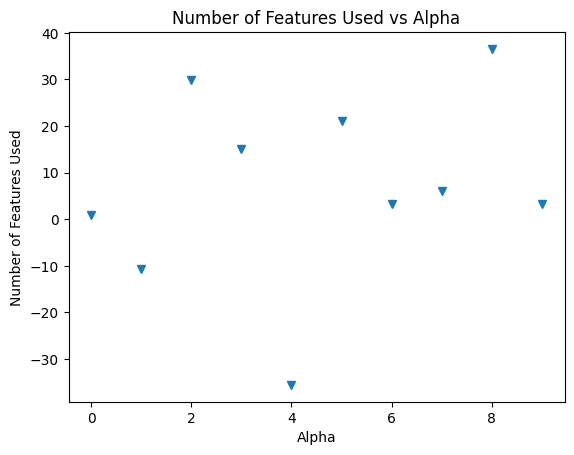

In [207]:
plt.xlabel("Alpha")
plt.ylabel("Number of Features Used")
plt.title("Number of Features Used vs Alpha")
# plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
# plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

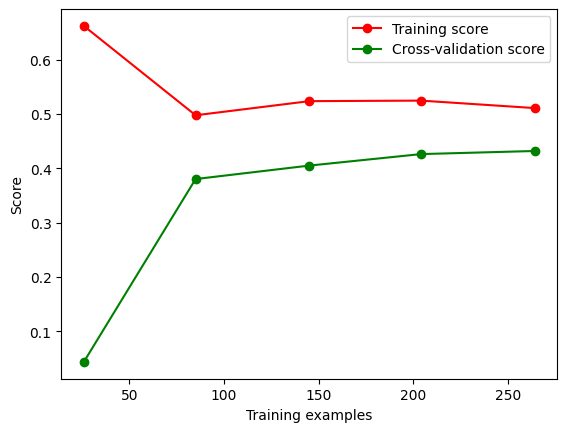

In [208]:
train_sizes, train_scores, test_scores = learning_curve(Lasso(alpha=0.01, max_iter=100000), X_train_scaled, y_train, train_sizes=np.linspace(0.1, 1.0, 5), cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.ylabel("Score")
plt.xlabel("Training examples")
plt.legend(loc="best")

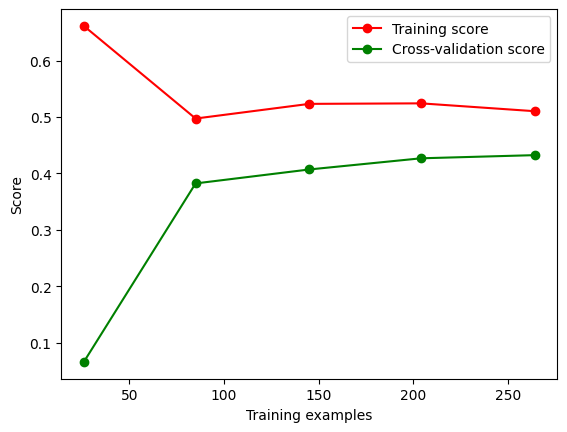

In [209]:
train_sizes, train_scores, test_scores = learning_curve(Lasso(alpha=0.1, max_iter=100000), X_train_scaled, y_train, train_sizes=np.linspace(0.1, 1.0, 5), cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.ylabel("Score")
plt.xlabel("Training examples")
plt.legend(loc="best")

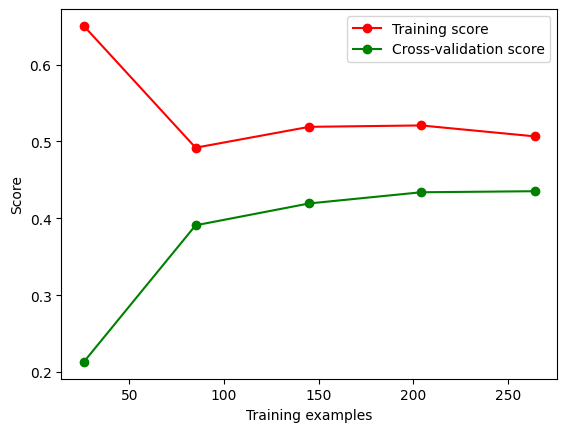

In [210]:
train_sizes, train_scores, test_scores = learning_curve(Lasso(alpha=1, max_iter=100000), X_train_scaled, y_train, train_sizes=np.linspace(0.1, 1.0, 5), cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.ylabel("Score")
plt.xlabel("Training examples")
plt.legend(loc="best")

## Regression Models

**Question 10**

### Grid Search

In [211]:
param_grid: dict[str, int] = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}
grid: GridSearchCV = GridSearchCV(Lasso(), param_grid, cv=5)
grid.fit(X_train_scaled, y_train)

print(f"Best cross-validation score: {grid.best_score_}")
print(f"Best parameters: {grid.best_params_}")

print(f"Training set score: {grid.score(X_train_scaled, y_train)}")
print(f"Test set score: {grid.score(X_test_scaled, y_test)}")
print(f"Number of features used: {np.sum(grid.best_estimator_.coef_ != 0)}")

Best cross-validation score: 0.43493178250833536
Best parameters: {'alpha': 1}
Training set score: 0.5019803901580563
Test set score: 0.5406111447534504
Number of features used: 7


### Lasso

- **Lasso** - type of linear regression that is used to model data that is sparse or has many features
  - Penalizes the coefficients of the features that are no important 
  - Penalization shrinks the coefficients of the unimportant features to 0
  - Improves the interpretability of the model and can be used to perform feature selection
  - Basically, it filters out useless data

In [212]:
best_score: float = 0
for gamma in [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]:
	lasso = Lasso(alpha=gamma, max_iter=100000).fit(X_train_scaled, y_train)
	score = lasso.score(X_test_scaled, y_test)
	if score > best_score:
		best_score = score
		best_parameters = {'alpha': gamma}

lasso = Lasso(**best_parameters).fit(X_train_scaled, y_train)

print(f"Best parameters: {best_parameters}")
print(f"Training set score: {lasso.score(X_train_scaled, y_train)}")
print(f"Test set score (cross-validation): {lasso.score(X_test_scaled, y_test)}")
print(f"Number of features used: {np.sum(lasso.coef_ != 0)}")

Best parameters: {'alpha': 0.0001}
Training set score: 0.5058671320290168
Test set score (cross-validation): 0.5425436032210349
Number of features used: 10


### Support Vector Regression

In [213]:
best_score: float = 0
for gamma in [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]:
	for C in [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]:
		svr = SVR(gamma=gamma, C=C).fit(X_train_scaled, y_train)
		score = svr.score(X_test_scaled, y_test)
		if score > best_score:
			best_score = score
			best_parameters = {'C': C, 'gamma': gamma}

svr = SVR(**best_parameters).fit(X_train_scaled, y_train)

print(f"Best parameters: {best_parameters}")
print(f"Training set score: {svr.score(X_train_scaled, y_train)}")
print(f"Test set score (cross-validation): {svr.score(X_test_scaled, y_test)}")
print(f"Number of support vectors: {svr.support_vectors_.shape[0]}")

Best parameters: {'C': 100, 'gamma': 0.01}
Training set score: 0.5154643735935897
Test set score (cross-validation): 0.5642881411578111
Number of support vectors: 331


### Ridge Regression

In [214]:
best_score: float = 0
for alpha in [0.001, 0.01, 0.1, 1, 10, 100]: # try different values for alpha
	ridge: Ridge = Ridge(alpha=alpha) # build the model
	ridge.fit(X_train, y_train) # train the model
	score: float = ridge.score(X_test, y_test) # evaluate the model on the test set
	if score > best_score: # if we got a better score, store the score and parameters
		best_score = score # store the best score
		best_parameters = {'alpha': alpha} # store the best parameters

ridge: Ridge = Ridge(**best_parameters) # build the model with the best parameters
ridge.fit(X_train, y_train) # train the model

print(f"Best parameters: {best_parameters}")
print(f"Training set score: {ridge.score(X_train, y_train)}") # evaluate the model on the training set
print(f"Test set score: {ridge.score(X_test, y_test)}") # evaluate the model on the test set
print(f"Number of features used: {np.sum(ridge.coef_ != 0)}") # count the number of features used

Best parameters: {'alpha': 0.001}
Training set score: 0.5058671324842083
Test set score: 0.5425435916186554
Number of features used: 10


### Comparison

#### Accuracy

- Comparing accuracy between several regression models
  - Grid Search
  - Lasso
  - Support Vector Regression
  - Ridge Regression
- The accuracy between all the models seems to be consistent
> Lasso is consistent with the accuracy of other models

Text(0.5, 0, 'Model')

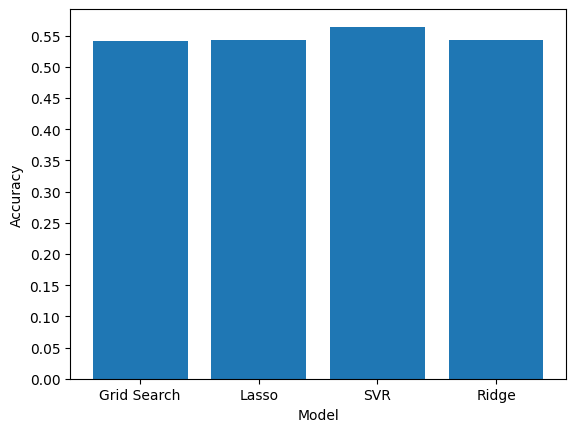

In [215]:
plt.bar(['Grid Search', 'Lasso', 'SVR', 'Ridge'], [grid.score(X_test_scaled, y_test), lasso.score(X_test_scaled, y_test), svr.score(X_test_scaled, y_test), ridge.score(X_test, y_test)])
plt.yticks(np.arange(0, 0.6, 0.05))
plt.ylabel('Accuracy')
plt.xlabel('Model')

#### Number of Features

- Comparing number of features used by each model
- Support Vector Regression uses the highest number of feature
  - `SVR` used all the features that were available
- `Lasso`, `Grid Search` and `Ridge` all use around the same number of features
> `Lasso` is consistent with the number of features used compared to `Grid Search` and `Ridge`. Much less features are required by `Lasso` compared to SVR. 

Text(0.5, 1.0, 'Number of Features Used by Each Model')

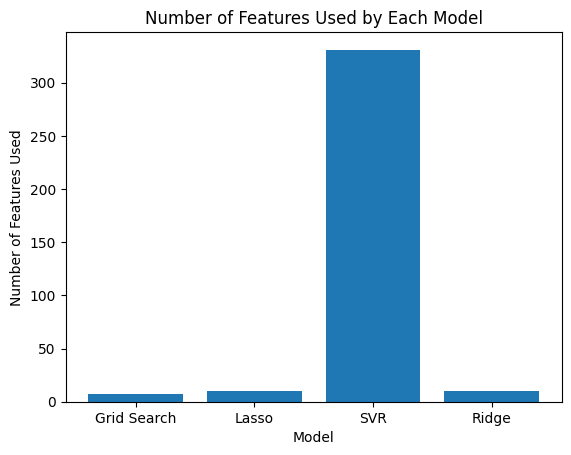

In [216]:
plt.bar(['Grid Search', 'Lasso', 'SVR', 'Ridge'], [np.sum(grid.best_estimator_.coef_ != 0), np.sum(lasso.coef_ != 0), svr.support_vectors_.shape[0], np.sum(ridge.coef_ != 0)])
plt.ylabel('Number of Features Used')
plt.xlabel('Model')
plt.title('Number of Features Used by Each Model')

#### Best Alpha

- Comparing alpha values for all models
- The accuracy of `Grid Search` drops while `Lasso`, `SVR` and `Ridge` stay the same 

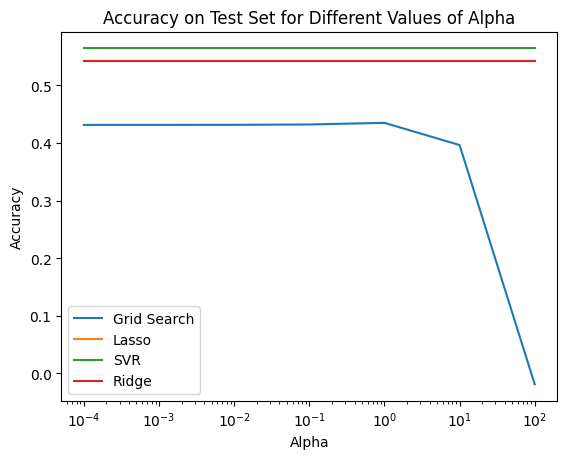

In [217]:
plt.plot([0.0001, 0.001, 0.01, 0.1, 1, 10, 100], grid.cv_results_['mean_test_score'], label='Grid Search')
plt.plot([0.0001, 0.001, 0.01, 0.1, 1, 10, 100], [lasso.score(X_test_scaled, y_test)] * 7, label='Lasso')
plt.plot([0.0001, 0.001, 0.01, 0.1, 1, 10, 100], [svr.score(X_test_scaled, y_test)] * 7, label='SVR')
plt.plot([0.0001, 0.001, 0.01, 0.1, 1, 10, 100], [ridge.score(X_test, y_test)] * 7, label='Ridge')
plt.ylabel('Accuracy')
plt.xlabel('Alpha')
plt.title('Accuracy on Test Set for Different Values of Alpha')
plt.xscale('log') # use a logarithmic scale for the x-axis
plt.legend()

Text(0.5, 0, 'Model')

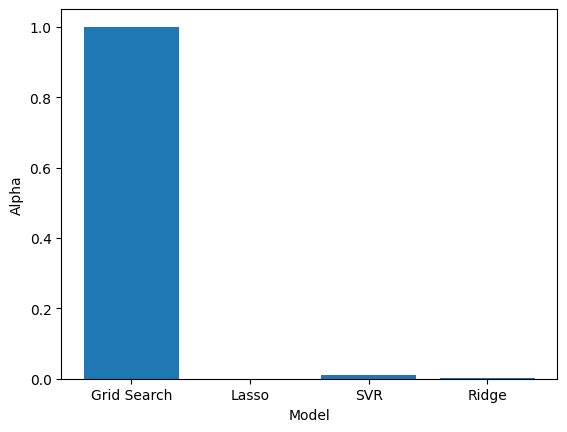

In [218]:
plt.bar(['Grid Search', 'Lasso', 'SVR', 'Ridge'], [grid.best_params_['alpha'], lasso.alpha, svr.gamma, ridge.alpha])
plt.ylabel('Alpha')
plt.xlabel('Model')

- Overall, `Lasso` is the best model 
  - It may not be the best in all scenarios but it does relatively well in all of them

# Conformal Prediction

**Question 11**

## Splitting Data into Training Set Proper & Validation Sets

*Part A*

- Splitting the data into training set and test set again (just in case)
  - As the variables may have been tempered with
- Splitting the training set into training set and validation set
  - Similar to splitting data into test and training sets
  - `test_size` in this case validation size is 99

In [219]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=55) # split the data into training and test sets
X_train_pr, X_val, y_train_pr, y_val = train_test_split(X_train, y_train, test_size=99, random_state=55) # split the training set into training and validation sets

In [220]:
print(f"X_val.shape: {X_val.shape}, y_val.shape: {y_val.shape}") # print the shapes of the validation set

X_val.shape: (99, 10), y_val.shape: (99,)


## Normalize Data

*Part B*

- Normalizing data using `StandardScalar`

In [221]:
scalar: StandardScaler = StandardScaler()

X_train_pr_scaled: np.ndarray = scalar.fit(X_train_pr)
X_train_pr_scaled: np.ndarray = scalar.transform(X_train_pr)

X_val_scaled: np.ndarray = scalar.fit(X_val)
X_val_scaled: np.ndarray = scalar.transform(X_val)

*Part C*

## Lasso

- Finds the optimal value for the regularization parameter `c` for a `Lasso` regression model
- Finds the optimal alpha value using the `Lasso` regression model

In [222]:
def cross_validation_optimal_alpha():
	c: float = 0.05 # set the regularization parameter
	best_score_conformal: float = np.NINF # initialize the best score (negative infinity)

	while c <= 5: # try different values for c
		lasso_model_check: Lasso = Lasso(alpha=c).fit(X_train_pr_scaled, y_train_pr) # build the model
		scores_conformal: float = np.mean(cross_val_score(lasso_model_check, X_train_pr_scaled, y_train_pr, cv=5)) # compute the mean score
		c += 0.05 # increase c
		if scores_conformal > best_score_conformal: # if we got a better score, store the score and parameters
			alpha_optimal_conformal: float = c # store the best alpha
			best_score_conformal = scores_conformal # store the best score
	return alpha_optimal_conformal, best_score_conformal, c

In [223]:
alpha_optimal_conformal, best_score_conformal, c = cross_validation_optimal_alpha() 
lasso_model = Lasso(alpha=alpha_optimal_conformal).fit(X_train_pr_scaled, y_train_pr) # build the model with the best parameters

In [224]:
print(f"Optimal alpha: {alpha_optimal_conformal}")
print(f"Best score: {best_score_conformal}")
print(f"Training set score: {lasso_model.score(X_train_pr_scaled, y_train_pr)}") # evaluate the model on the training set
print(f"Test set score: {lasso_model.score(X_val_scaled, y_val)}") # evaluate the model on the test set
print(f"Number of features used: {np.sum(lasso_model.coef_ != 0)}") # count the number of features used

Optimal alpha: 0.1
Best score: 0.44440857327195565
Training set score: 0.4903096582603643
Test set score: 0.5235125777337516
Number of features used: 10


## Inductive Conformal Prediction

### Computing Score

- Computes the score for each combination of nearest neighbours between the calibration set and proper set
- The `score` is $\alpha = |y-\hat{y}|$

In [225]:
def compute_alpha(y_hat_calibration_list: np.ndarray, y_val: np.ndarray) -> np.ndarray:
	""" Compute the alpha values for the conformal prediction.

	Args:
		y_hat_calibration_list (np.ndarray): calibration set 
		y_val (np.ndarray): proper set

	Returns:
		np.ndarray: list of alpha values
	"""
	return (np.sort(abs(y_hat_calibration_list - y_val))) # alpha values for the calibration set alpha = |y-hat - y|

### Computing Predicted Sample $k$

- The predicted sample is computed with the following formula:
$$k=(1-ε)(m+1)$$

In [226]:
def compute_k(alpha_values: np.ndarray, significance_level: float) -> int:
	"""Compute the k value for the conformal prediction.

	Args:
		alpha_values (np.ndarray): alpha values for the calibration set
		significance_level (float): significance level (epsilon)

	Returns:
		int: k value
	"""
	return (math.ceil((1 - significance_level) * len(alpha_values) + 1))

### Computing Error Rate

- Computes the error rate
$$\frac{n-count}{n}$$

In [227]:
def compute_test_error(y_test: np.ndarray, count_c: int) -> float:
	"""Computes the test error.

	Args:
		y_test (np.ndarray): test set to compare with the prediction
		count_c (int): number of points in the prediction

	Returns:
		float: error rate
	"""
	return (len(y_test) - count_c) / len(y_test) # formula = (n - count) / n

### Computing Length of Prediction Intervals (Amplitude)

- Returns the count of samples and a list of amplitudes 
- For each element in the validation test set, the amplitude is computed
  - The maximum and minimum are used
  - $amplitude=|y_{max}-y_{min}|$
  - Increments the counter if the y calibration sample lies between the minimum and maximum

In [228]:
def compute_amplitude(y_hat_test_list: np.ndarray) -> tuple[int, list[float]]:
	y_c: list[tuple[float]] = [[]] # list of (sample, distance)
	count_c: int = 0 # number of samples within the prediction interval
	amplitude: list[float] = [] # list of amplitudes
	
	for index, element in enumerate(y_hat_test_list): # for each element in the test set
		y_min: float = element - c # y_min = y_hat - c
		y_max: float = element + c # y_max = y_hat + c
		y_c.append((y_min, y_max)) # append the interval to the list of intervals
		amplitude.append(abs(y_max - y_min)) # append the length of the interval to the list of lengths

		if y_min <= element <= y_max: # if the element is in the interval
			count_c += 1 # increment the count

	return (count_c, amplitude)

### Main Algorithm for Inductive Conformal Prediction

- Computes the Length of Prediction Intervals (Amplitude), regularization parameter and error rate with the help of other functions

In [229]:
def conformal(X_val_scaled: np.ndarray, y_val: np.ndarray, X_test_scaled: np.ndarray, y_test: np.ndarray, significance_level: float):
	y_hat_test_list: list[float] = lasso_model.predict(X_val_scaled) # y-hat test set
	count_c, amplitude = compute_amplitude(y_hat_test_list)
	y_hat_calibration_list: np.ndarray = lasso_model.predict(X_val_scaled) # y-hat calibration set
	alpha_values: list[float] = compute_alpha(y_hat_calibration_list, y_val) 
	k: int = compute_k(alpha_values, significance_level) 
	c: float = alpha_values[k] # c value for the calibration set
	test_error: float = compute_test_error(y_test, count_c) # compute the test error
	return (c, test_error, amplitude)

#### 5%

- Using conformal prediction

In [230]:
c, test_error, amplitude = conformal(X_val_scaled, y_val, X_test_scaled, y_test, 0.05)
print(f"Error Rate: {test_error}")
print(f"Amplitude (Length of Interval): {np.mean(amplitude)}")

Error Rate: 0.10810810810810811
Amplitude (Length of Interval): 10.099999999999971


- Validating using `Lasso`

In [231]:
alpha_optimal_conformal, best_score_conformal, c = cross_validation_optimal_alpha()
lasso_model = Lasso(alpha=alpha_optimal_conformal).fit(X_train_pr_scaled, y_train_pr) # build the model with the best parameters
c, test_error, amplitude = conformal(X_val_scaled, y_val, X_test_scaled, y_test, 0.05)
print(f"Error Rate: {test_error}")
print(f"Amplitude (Length of Interval): {np.mean(amplitude)}")

Error Rate: 0.10810810810810811
Amplitude (Length of Interval): 10.099999999999971


#### 20%

In [232]:
c, test_error, amplitude = conformal(X_val_scaled, y_val, X_test_scaled, y_test, 0.2)
print(f"Error Rate: {test_error}")
print(f"Amplitude (Length of Interval): {np.mean(amplitude)}")

Error Rate: 0.10810810810810811
Amplitude (Length of Interval): 234.22869296238946


In [233]:
alpha_optimal_conformal, best_score_conformal, c = cross_validation_optimal_alpha()
lasso_model = Lasso(alpha=alpha_optimal_conformal).fit(X_train_pr_scaled, y_train_pr) # build the model with the best parameters
c, test_error, amplitude = conformal(X_val_scaled, y_val, X_test_scaled, y_test, 0.2)
print(f"Error Rate: {test_error}")
print(f"Amplitude (Length of Interval): {np.mean(amplitude)}")

Error Rate: 0.10810810810810811
Amplitude (Length of Interval): 10.099999999999971
